In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

In [3]:
dicom_data = pd.read_csv('/content/drive/MyDrive/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path

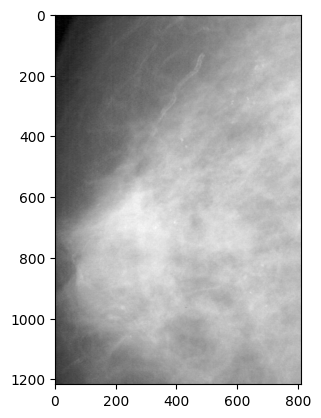

In [4]:
image_dir = '/content/drive/MyDrive/cbis-ddsm-breast-cancer-image-dataset/jpeg'
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
for file  in cropped_images[0:5]:
  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

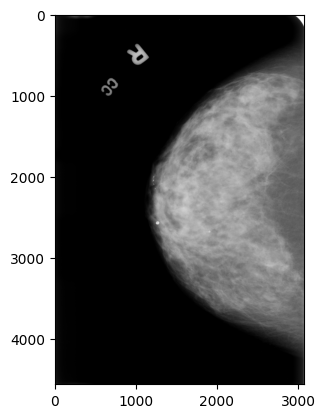

In [5]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
for file  in full_mammogram_images[0:5]:
  full_mammogram_images_show = PIL.Image.open(file)
  gray_img= full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [6]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))

In [7]:
data_1=pd.read_csv('/content/drive/MyDrive/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')
data_2=pd.read_csv('/content/drive/MyDrive/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')

In [8]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate',
                          'ContentTime','PatientSex','PatientBirthDate',
                          'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                          'StudyDate','StudyID','StudyInstanceUID','StudyTime',
                          'InstanceNumber','SeriesInstanceUID','SeriesNumber'],
                           axis =1, inplace=True)

In [9]:
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

<ipython-input-9-fb261281481d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
<ipython-input-9-fb261281481d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)


In [10]:
Data_cleaning_1 = data_1.copy()
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

<ipython-input-10-50d3ee841a92>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
<ipython-input-10-50d3ee841a92>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)


In [11]:
Data_cleaning_2 = data_2.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)

<ipython-input-11-f55dfa474e51>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)
<ipython-input-11-f55dfa474e51>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


In [12]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download the dataset
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.10G/3.10G [02:29<00:00, 23.0MB/s]
100% 3.10G/3.10G [02:29<00:00, 22.2MB/s]


In [13]:
cd sample_data

/content/sample_data


In [14]:
!unzip /content/breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [15]:
breast_img = glob.glob('/content/sample_data/IDC_regular_ps50_idx5/**/*.png', recursive = True)


In [16]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)

    elif img[-5] == '1' :
        can_img.append(img)

In [17]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer

total_img_num = non_can_num + can_num

print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [18]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

In [19]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
bar_2 =px.bar(data_frame=data_insight_2, x = 'abnormality', y='counts_of_abnormalties', color = 'abnormality')
bar_2.update_layout(title_text='Types of abnormalites of cancer', title_x=0.5)
bar_2.show()

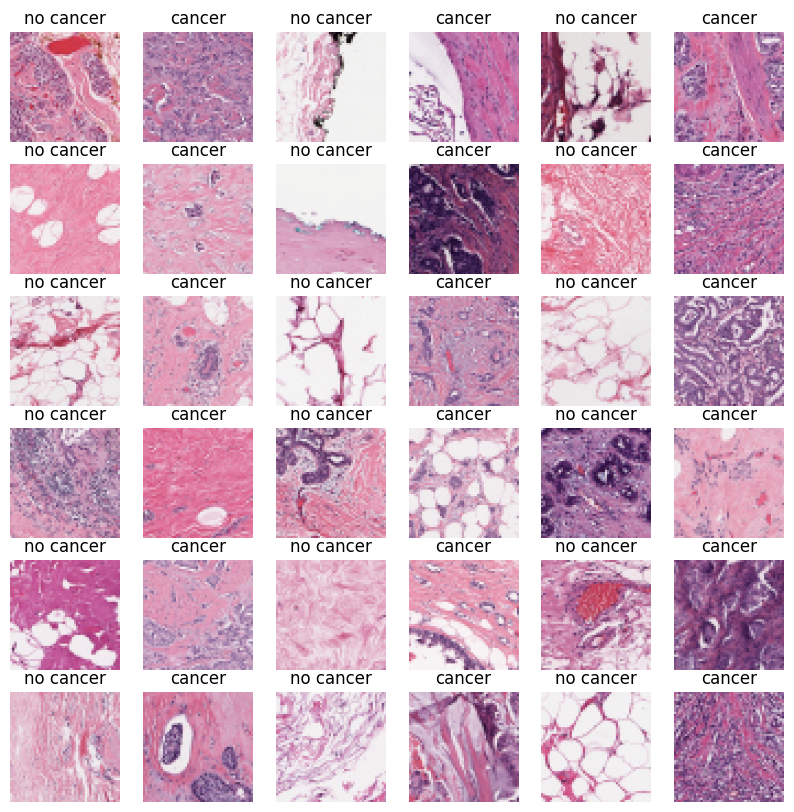

In [20]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize = (10, 10))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:

        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

s = 1
for num in some_can:

        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1


In [21]:
non_can_img_sampled = non_can_img[0:30000]
can_img_sampled = can_img[0:75000]

In [22]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_can_img_sampled, len(non_can_img_sampled))
some_can_img = random.sample(can_img_sampled, len(can_img_sampled))

X = []
y = []
for img in some_non_img:
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    X.append(n_img_size)
    y.append(0)

for img in some_can_img:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    X.append(c_img_size)
    y.append(1)

In [23]:
X = np.array(X)
y = np.array(y)
print('X shape : {}' .format(X.shape))

X shape : (105000, 50, 50, 3)


In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

def resampling(X,y,dim_x = 50, dime_y = 50, channels = 3):
  X_reshaped = X.reshape(X.shape[0], X.shape[-3]* X.shape[-2]* X.shape[-1])
  ros = RandomOverSampler()
  oversample = SMOTE()
  X_over, y_over = ros.fit_resample(X_reshaped, y)
  X_sm, y_sm = oversample.fit_resample(X_reshaped, y)
  X_augmented =pd.concat([pd.DataFrame(X_over),pd.DataFrame(X_sm)],axis=0)
  Y_augmented =pd.concat([pd.DataFrame(y_over),pd.DataFrame(y_sm)],axis=0)
  X_augmented_array = np.array(X_augmented)
  X_augmented_array3d = X_augmented_array.reshape(X_augmented_array.shape[0],dim_x, dime_y, channels)
  Y_augmented = np.array(Y_augmented)
  print("The shape of the sampeled dataset is: ", X_augmented_array3d.shape)
  print("The shape of the sampeled target is: ", Y_augmented.shape)
  return X_augmented_array3d, Y_augmented

In [25]:
X_sampeled , Y_sampled = resampling(X,y)

The shape of the sampeled dataset is:  (300000, 50, 50, 3)
The shape of the sampeled target is:  (300000, 1)


In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X_sampeled, Y_sampled, test_size = 0.3,random_state = 21)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (210000, 50, 50, 3)
X_test shape : (90000, 50, 50, 3)
y_train shape : (210000, 2)
y_test shape : (90000, 2)


In [27]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,DepthwiseConv2D,Dropout, Activation, Reshape, Flatten, \
    LSTM, Dense, Dropout, Embedding, Bidirectional, GRU,Flatten, Activation,\
    BatchNormalization, UpSampling2D,Conv1D, Conv2D, Input, Concatenate,multiply, add,\
    AveragePooling1D, UpSampling1D,Lambda, Average, Dense, Flatten,GRU,Attention
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,\
    ReduceLROnPlateau, LearningRateScheduler, CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Lambda, Conv2D, Activation,\
    BatchNormalization, UpSampling2D, multiply, add, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import initializers, regularizers, optimizers
#from keras.engine.topology import Layer
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import constraints
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc ,average_precision_score , classification_report, confusion_matrix ,matthews_corrcoef

In [28]:
def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = inputs.shape
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c//ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = multiply([inputs,x])
    return x

In [29]:
input_A = Input((50,50, 3))
Conv1_1out =Conv2D(filters=8,kernel_size=(7,7), activation='relu',
                                   padding='same')(input_A)
SqueezeAndExcitation1 =  SqueezeAndExcitation(Conv1_1out)
Conv1_1outBN = BatchNormalization()(SqueezeAndExcitation1)
MaxPoolingA1 = MaxPooling2D(pool_size=(2, 2))(Conv1_1outBN)
Conv2_1out = Conv2D(filters=32,kernel_size=(5,5), activation='relu',
                                   padding='same')(MaxPoolingA1)
SqueezeAndExcitation2 =  SqueezeAndExcitation(Conv2_1out)
Conv2_1outBN = BatchNormalization()(SqueezeAndExcitation2)
Conv3_1out_depth = DepthwiseConv2D(kernel_size=(7,7), activation='relu',
                                   padding='same')(Conv2_1outBN)
SqueezeAndExcitation3 =  SqueezeAndExcitation(Conv3_1out_depth)
Conv3_1outBN_depth = BatchNormalization()(SqueezeAndExcitation3)
Attention_out1_1 = add([Conv2_1outBN, Conv3_1outBN_depth])
MaxPoolingA2_depth = MaxPooling2D(pool_size=(2, 2))(Attention_out1_1)
print(MaxPoolingA2_depth.shape)

Conv4_1out = Conv2D(filters=128,kernel_size=(3,3), activation='relu',
                                   padding='same')(MaxPoolingA2_depth)
SqueezeAndExcitation4 =  SqueezeAndExcitation(Conv4_1out)
Conv4_1outBN = BatchNormalization()(SqueezeAndExcitation4)

Conv5_1out_depth = DepthwiseConv2D(kernel_size=(3,3), activation='relu',
                                   padding='same')(Conv4_1outBN)
SqueezeAndExcitation5 =  SqueezeAndExcitation(Conv5_1out_depth)
Conv5_1outBN_depth = BatchNormalization()(SqueezeAndExcitation5)
Attention_out2_1 = add([Conv4_1outBN, Conv5_1outBN_depth])
MaxPoolingA3_depth = MaxPooling2D(pool_size=(4, 4))(Attention_out2_1)
flatten = Flatten()(MaxPoolingA3_depth)
print(flatten.shape)
out1 = Dense(128, activation='swish', kernel_initializer=initializers.glorot_normal(seed=777),
             bias_initializer='zeros')(flatten)
dropout1 = Dropout(0.2)(out1)
out2 = Dense(32, activation='swish', kernel_initializer=initializers.glorot_normal(seed=777),
             bias_initializer='zeros')(dropout1)
dropout2 = Dropout(0.2)(out2)
out = Dense(2, activation='softmax', kernel_initializer=initializers.glorot_normal(seed=777), bias_initializer='zeros')(dropout2)
CNN_conv_depth = Model(inputs=[input_A], outputs=[out])
CNN_conv_depth.compile(optimizer='Nadam',
                       loss=tf.keras.losses.BinaryFocalCrossentropy(apply_class_balancing=True,
                      gamma=0.39, from_logits=True), metrics = ['accuracy'])


(None, 12, 12, 32)
(None, 1152)


In [30]:
CNN_conv_depth.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 50, 50, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 50, 50, 8)      │          1,184 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 8)              │              0 │ conv2d[0][0]           │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │              8 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 8)              │              8 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 50, 50, 8)      │              0 │ conv2d[0][0],          │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 50, 50, 8)      │             32 │ multiply[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 25, 25, 8)      │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 25, 25, 32)     │          6,432 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ conv2d_1[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 4)              │            128 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 32)             │            128 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_1 (Multiply)     │ (None, 25, 25, 32)     │              0 │ conv2d_1[0][0],        │
│                           │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 25, 25, 32)     │            128 │ multiply_1[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d          │ (None, 25, 25, 32)     │          1,600 │ batch_normalization_1… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_poolin

 Total params: 209,298 (817.57 KB)

 Trainable params: 208,642 (815.01 KB)

 Non-trainable params: 656 (2.56 KB)

In [31]:
early_stopping_cb =  tf.keras.callbacks.EarlyStopping(patience=150,
restore_best_weights=True)
lr_scheduler1 = tf.keras.callbacks.ReduceLROnPlateau(factor=0.333, patience=50)

In [32]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [33]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("CNN_attention_depth_temporal.keras",
save_best_only=True)

In [ ]:
historyf = CNN_conv_depth.fit(x=X_train, y=y_train, batch_size=512,
                                               validation_data=(X_test,y_test), validation_batch_size=512,
                                              epochs=200, verbose=2,
                                             callbacks=[tensorboard_callback,early_stopping_cb,lr_scheduler1,checkpoint_cb])

Epoch 1/200
821/821 - 58s - 71ms/step - accuracy: 0.8266 - loss: 0.2699 - val_accuracy: 0.7559 - val_loss: 0.2893 - learning_rate: 0.0010
Epoch 2/200
821/821 - 54s - 66ms/step - accuracy: 0.8453 - loss: 0.2648 - val_accuracy: 0.6143 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 3/200
821/821 - 42s - 51ms/step - accuracy: 0.8548 - loss: 0.2620 - val_accuracy: 0.8102 - val_loss: 0.2747 - learning_rate: 0.0010
Epoch 4/200
821/821 - 41s - 50ms/step - accuracy: 0.8612 - loss: 0.2603 - val_accuracy: 0.8159 - val_loss: 0.2729 - learning_rate: 0.0010
Epoch 5/200
821/821 - 40s - 49ms/step - accuracy: 0.8662 - loss: 0.2589 - val_accuracy: 0.8517 - val_loss: 0.2627 - learning_rate: 0.0010
Epoch 6/200
821/821 - 23s - 29ms/step - accuracy: 0.8708 - loss: 0.2577 - val_accuracy: 0.8024 - val_loss: 0.2762 - learning_rate: 0.0010
Epoch 7/200
821/821 - 41s - 50ms/step - accuracy: 0.8752 - loss: 0.2564 - val_accuracy: 0.7508 - val_loss: 0.2910 - learning_rate: 0.0010
Epoch 8/200
821/821 - 41s - 50ms/s

In [ ]:
loss, acc = CNN_conv_depth.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = CNN_conv_depth.predict(X_test)
# Adjust the threshold for binary classification
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics on the test set
CNN_conv_depth_accuracy = accuracy_score(y_test, y_pred_binary)
CNN_conv_depth_precision = precision_score(y_test, y_pred_binary, average='micro')
CNN_conv_depth_recall = recall_score(y_test, y_pred_binary, average='micro')
CNN_conv_depth_f1 = f1_score(y_test, y_pred_binary, average='micro')
#Transfomer_Attention_mcc = matthews_corrcoef(Target3d_test, y_pred_binary)
CNN_conv_depth_auc = roc_auc_score(y_test, y_pred_binary)

# Print evaluation metrics
print("Test Loss:", loss)
print("Test Accuracy:", CNN_conv_depth_accuracy)
print("Test Precision:", CNN_conv_depth_precision)
print("Test Recall:", CNN_conv_depth_recall)
print("Test F1 Score:", CNN_conv_depth_f1)
print("Test AUC:", CNN_conv_depth_auc)
#print("Test Matthews Correlation Coefficient:", Transfomer_Attention_mcc)